In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
#import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#import xgboost as xgb
#import lightgbm as lgb

# model tuning
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [161]:
valid_part = 0.3
pd.options.display.max_columns = 30

In [162]:
train0 = pd.read_csv('vehicles.csv')
train0.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [163]:
train0.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [164]:
train0.iloc[50]

id                                                     7314811909
url             https://auburn.craigslist.org/ctd/d/auburn-uni...
region                                                     auburn
region_url                          https://auburn.craigslist.org
price                                                       38990
year                                                       2020.0
manufacturer                                                 ford
model                                      f150 supercrew cab xlt
condition                                                    good
cylinders                                             6 cylinders
fuel                                                          gas
odometer                                                  12231.0
title_status                                                clean
transmission                                                other
VIN                                             1FTEW1CP4LFB84170
drive     

In [165]:
train0.shape

(426880, 26)

In [166]:
train0.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,5,NaN,6,3,118264,3,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


# Conhecendo os dados

Coluna | Descrição          

- id:   Codigo identificaçao    
- url:  Link para anuncio de venda      
- region: Cidade que o veiculo se encontra      
- region_url: Link para craigslist da cidade      
- price: Preço de venda do veiculo (feature a ser predita)
- year: Ano veiculo       
- manufacturer: Fabricante        
- model: Modelo veiculo       
- condition: Condição do veiculo(Otimo, Bom, ruim, etc)     
- cylinders: Numero de cilindros do motor     
- fuel: Tipo de motor(Eletrico, diesel, gasolina, etc)        
- odometer: Quilometragem do veiculo (Provavelmente esta em milhas devido a ser um base dos USA)      
- title_status: Titulo do anuncio ???     
- transmission: Tipo de transmissão (Automatico, manual)      
- VIN (ehicle identification number): Numero do chassi
- drive: tração do veiculo        
- size: Tamanho veiculo ( compacto, médio, etc)
- type: Tipo do veiculo ( sedan, SUV, etc)        
- paint_color: Cor do veiculo     
- image_url: foto veiculo
- description: Anuncio do vendedor
- country: Coluna em branco
- state: Sufixo do estado
- lat: coordenadas geograficas      
- long: coordenadas geograficas
- posting_date: data de publicação do anuncio

# Analisando Feature VIN

In [167]:
train0['VIN'].value_counts()

1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
2G4GP5EX5E9213578      1
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
SAJGX2749VCOO8376      1
Name: VIN, Length: 118264, dtype: int64

In [168]:
train0['description'][41]

"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000978547📱 Want to instantly check this car’s availability? Call us at  334-758-9176Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7105924-74502 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 2 minut

In [169]:
train0[train0['VIN']=='5TFTX4CN3EX042751']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
41,7315715960,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-02T08:44:35-0500
284,7315826530,https://bham.craigslist.org/ctd/d/birmingham-2...,birmingham,https://bham.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,al,33.520000,-86.790000,2021-05-02T12:41:39-0500
1843,7315765953,https://dothan.craigslist.org/ctd/d/dothan-201...,dothan,https://dothan.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,al,31.230000,-85.400000,2021-05-02T10:41:36-0500
2163,7315719002,https://shoals.craigslist.org/ctd/d/atlanta-20...,florence / muscle shoals,https://shoals.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,al,33.779214,-84.411811,2021-05-02T08:52:12-0500
2322,7315805371,https://gadsden.craigslist.org/ctd/d/gadsden-2...,gadsden-anniston,https://gadsden.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,al,34.010000,-86.010000,2021-05-02T12:01:08-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417050,7316847047,https://greenbay.craigslist.org/ctd/d/green-ba...,green bay,https://greenbay.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,wi,44.520000,-87.980000,2021-05-04T13:21:05-0500
419362,7311310646,https://lacrosse.craigslist.org/ctd/d/la-cross...,la crosse,https://lacrosse.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,wi,43.820000,-91.230000,2021-04-23T09:00:52-0500
420587,7311928821,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,wi,43.070000,-89.380000,2021-04-24T12:01:16-0500
423781,7311784155,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,wi,43.060000,-87.960000,2021-04-24T07:11:51-0500


A coluna VIN deveria ser unica para cada veiculo, ao analisar mais a fundo observou que varios anuncios são repetidos, pois se tratam de um terceiro anunciando o mesmo veiculo em craiglist de diferentes cidades e estados

In [170]:
train0.duplicated(subset=['price', 'year', 'manufacturer',  'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color'],keep='first').sum()

178203

Removendo dados duplicados

In [171]:
df_train = train0.drop_duplicates(subset=['price', 'year', 'manufacturer',  'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color'], keep='first')

In [172]:
df_train.duplicated(subset=['price', 'year', 'manufacturer',  'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color'],keep='first').sum()

0

Após remoção de duplicados e analise inicial dos dados as colunas abaixo foram consideras como desnecessarias para predição do preço de venda

In [173]:
drop_cols_1=['id', 'url', 'region_url','VIN','image_url', 'description', 'county', 'lat', 'long','posting_date']

In [174]:
df_train = df_train.drop(columns=drop_cols_1)

In [175]:
df_train.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


# Analise exploratória

Verificando qualidade dos dados

In [176]:
df_train.describe()

,price,year,odometer
count,2.486770e+05,247989.000000,2.460110e+05
mean,1.132790e+05,2009.427918,1.123592e+05
std,1.596094e+07,10.764904,2.507468e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.900000e+03,2006.000000,5.177500e+04
50%,9.999000e+03,2012.000000,9.970000e+04
75%,1.996800e+04,2016.000000,1.455030e+05
max,3.736929e+09,2022.000000,1.000000e+07


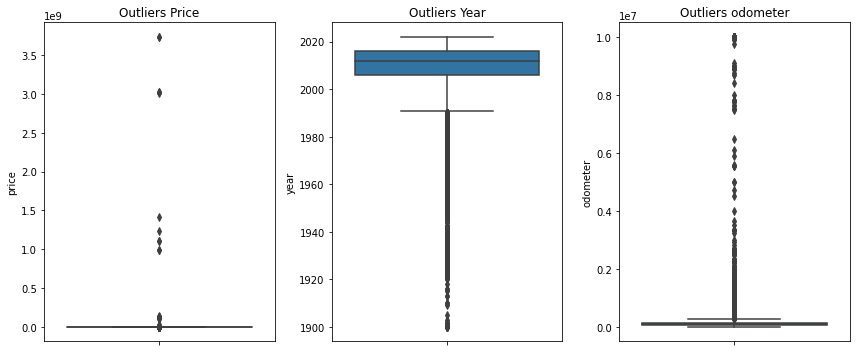

In [177]:
# Create a grid of boxplots with separate plots for different categories
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Create boxplots
sns.boxplot(data=df_train, y='price', ax=axes[0])
sns.boxplot(data=df_train, y='year', ax=axes[1])
sns.boxplot(data=df_train, y='odometer', ax=axes[2])

# Customize the plot
axes[0].set_title('Outliers Price')
axes[1].set_title('Outliers Year')
axes[2].set_title('Outliers odometer')
plt.tight_layout()

# Show the plot
plt.show()


In [178]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

# Define a condition for outlier detection across all columns
outlier_condition = (df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))

# Use the .any(axis=1) to identify rows with outliers in any column
outlier_rows = outlier_condition.any(axis=1)

# Remove rows with outliers
df_no_outliers = df_train[~outlier_rows]
df_no_outliers.shape

(223833, 16)

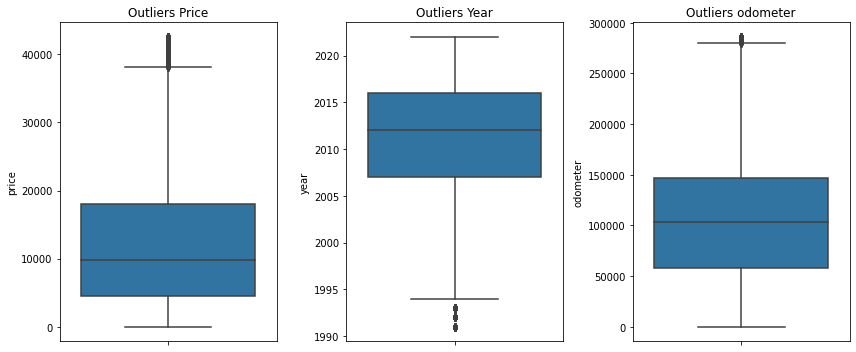

In [179]:
# Create a grid of boxplots with separate plots for different categories
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Create boxplots
sns.boxplot(data=df_no_outliers, y='price', ax=axes[0])
sns.boxplot(data=df_no_outliers, y='year', ax=axes[1])
sns.boxplot(data=df_no_outliers, y='odometer', ax=axes[2])

# Customize the plot
axes[0].set_title('Outliers Price')
axes[1].set_title('Outliers Year')
axes[2].set_title('Outliers odometer')
plt.tight_layout()

# Show the plot
plt.show()


In [180]:
df_qualit = pd.DataFrame(df_no_outliers.isna().sum(),columns=['sum'])
df_qualit['%'] = df_no_outliers.isna().sum()/df_no_outliers.shape[0]
df_qualit

,sum,%
region,0,0.000000
price,0,0.000000
year,524,0.002341
manufacturer,7461,0.033333
model,2524,0.011276
condition,89329,0.399088
cylinders,80099,0.357852
fuel,1636,0.007309
odometer,2571,0.011486
title_status,4111,0.018366


In [181]:
df_train.manufacturer.value_counts(dropna=False)

ford               40825
chevrolet          31964
toyota             21356
honda              14720
nissan             12337
jeep               11432
NaN                10870
gmc                 9033
ram                 8735
dodge               8098
bmw                 7687
mercedes-benz       6592
subaru              6428
hyundai             6330
volkswagen          5533
kia                 5058
lexus               4358
chrysler            4018
cadillac            3836
audi                3654
mazda               3275
buick               3148
acura               2677
infiniti            2287
lincoln             2020
volvo               1921
pontiac             1738
mitsubishi          1616
mini                1383
rover               1294
mercury              889
porsche              869
saturn               779
jaguar               748
fiat                 423
tesla                292
alfa-romeo           209
harley-davidson      104
ferrari               53
datsun                53


In [182]:
df_train.model.value_counts(dropna=False)

f-150                        4575
NaN                          3692
silverado 1500               2880
1500                         2426
camry                        2269
                             ... 
xt5 platinum                    1
highlander limited platin       1
1500 5.7 hemi                   1
cooper clubman jcw              1
Paige Glenbrook Touring         1
Name: model, Length: 29668, dtype: int64

Coluna model apresenta mais de uma descrição para o mesmo modelo de veiculo

In [183]:
df_train[df_train.model.str.contains('f-150')==True]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
228,birmingham,5500,1978.0,ford,f-150,good,8 cylinders,gas,239000.0,clean,automatic,NaN,full-size,truck,green,al
235,birmingham,27995,2017.0,ford,f-150,NaN,NaN,gas,101000.0,clean,automatic,4wd,NaN,NaN,NaN,al
249,birmingham,37500,2018.0,ford,f-150,NaN,NaN,gas,30026.0,clean,automatic,4wd,NaN,NaN,blue,al
337,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426434,wyoming,1800,1991.0,ford,f-150,NaN,NaN,gas,57000.0,clean,automatic,NaN,NaN,NaN,NaN,wy
426444,wyoming,9000,2011.0,ford,f-150,NaN,8 cylinders,gas,165000.0,clean,automatic,4wd,NaN,NaN,NaN,wy
426456,wyoming,9500,1979.0,ford,f-150,NaN,NaN,gas,68000.0,clean,automatic,rwd,NaN,NaN,NaN,wy
426509,wyoming,4995,2004.0,ford,f-150 fx4,NaN,8 cylinders,gas,198000.0,clean,automatic,4wd,NaN,NaN,NaN,wy


In [184]:
df_train.model.str.contains('f-150').sum()

5991

In [185]:
df_train.condition.value_counts(dropna=False)

NaN          99179
excellent    70618
good         54787
like new     15952
fair          6515
new           1049
salvage        577
Name: condition, dtype: int64

In [186]:
df_train.cylinders.value_counts(dropna=False)

NaN             89597
4 cylinders     56693
6 cylinders     56519
8 cylinders     42147
5 cylinders      1363
other            1017
10 cylinders      730
3 cylinders       454
12 cylinders      157
Name: cylinders, dtype: int64

In [187]:
df_train.fuel.value_counts(dropna=False)

gas         218331
diesel       15017
other         9665
hybrid        3067
NaN           1753
electric       844
Name: fuel, dtype: int64

In [188]:
df_train.title_status.value_counts(dropna=False)

clean         233282
rebuilt         5724
NaN             4280
salvage         3087
lien            1376
missing          742
parts only       186
Name: title_status, dtype: int64

In [189]:
df_train.type.value_counts(dropna=False)

NaN            62810
sedan          51967
SUV            48908
truck          20074
pickup         18205
coupe          10188
hatchback       8439
other           7726
wagon           5925
convertible     5096
van             4790
mini-van        3659
offroad          548
bus              342
Name: type, dtype: int64

In [190]:
df_train.paint_color.value_counts(dropna=False)

NaN       74974
white     42724
black     34492
silver    25845
blue      18755
grey      17408
red       17327
green      5063
custom     4777
brown      4172
yellow     1480
orange     1150
purple      510
Name: paint_color, dtype: int64

Para as colunas de Year,model,manufacturer e odometer vamos retirar todas as linhas com nulos, pois consideramos que estes são as principais informações para se definir o preço do veiculo.

In [191]:
df_no_outliers.dropna(subset=['year','manufacturer','model','odometer'],inplace=True)

In [198]:
df_qualit = pd.DataFrame(df_no_outliers.isna().sum(),columns=['sum'])
df_qualit['%'] = df_no_outliers.isna().sum()/df_no_outliers.shape[0]
df_qualit

,sum,%
region,0,0.000000
price,0,0.000000
year,0,0.000000
manufacturer,0,0.000000
model,0,0.000000
condition,83990,0.397195
cylinders,74573,0.352661
fuel,1142,0.005401
odometer,0,0.000000
title_status,3554,0.016807


Para as outras colunas vamos substituir os valores nulos por "NA", pois consideramos que não são os fatores fundamentais para o preço mas devem ser considerados

In [201]:
df_final = df_no_outliers.drop(columns=['size']).fillna(value='NA')

In [204]:
df_qualit = pd.DataFrame(df_final.isna().sum(),columns=['sum'])
df_qualit['%'] = df_final.isna().sum()/df_final.shape[0]
df_qualit

,sum,%
region,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0


# Modelagem

In [206]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df_final.columns.values.tolist()
for col in features:
    if df_final[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in df_final.columns:
        le = LabelEncoder()
        le.fit(list(df_final[col].astype(str).values))
        df_final[col] = le.transform(list(df_final[col].astype(str).values))

In [207]:
df_final

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,16,33590,2014.0,13,16203,3,6,3,57923.0,1,3,1,9,11,1
28,16,22590,2010.0,7,16501,3,6,3,71229.0,1,3,1,9,2,1
29,16,39590,2020.0,7,16545,3,6,3,19160.0,1,3,1,9,9,1
30,16,30990,2017.0,37,19114,3,6,3,41124.0,1,3,1,9,9,1
31,16,15000,2013.0,12,8184,1,5,3,128000.0,1,1,3,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,397,18000,2005.0,7,16590,1,6,3,130000.0,2,1,0,11,2,50
426813,397,1000,1998.0,12,7653,0,5,3,190000.0,1,1,1,0,0,50
426819,397,21990,2016.0,4,901,3,7,5,26599.0,1,1,3,10,2,50
426833,397,6800,1997.0,18,20299,3,6,3,69550.0,1,1,3,3,11,50


In [208]:
target_name = 'price'
train_target0 = df_final[target_name]
train0 = df_final.drop([target_name], axis=1)

In [209]:
# Synthesis test0 from train0
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [210]:
# For boosting model
train0b = train0
train_target0b = train_target0
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)

In [211]:
#For models from Sklearn
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [212]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)

In [213]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [214]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [215]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [216]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [217]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [19990 27500 19590 19995     0]
ytrain =  [19058.8591205  21347.591046   27254.63116201 13574.08482544
 14730.6080168 ]
acc(r2_score) for train = 30.61
acc(relative error) for train = 49.43
acc(rmse) for train = 847265.41
target_test = [ 7250 34477 17500 22998 11500]
ytest = [ 9527.52368819 21154.90628669 14709.0245576  16820.25616844
  7623.47001326]
acc(r2_score) for test = 30.82
acc(relative error) for test = 49.33
acc(rmse) for test = 843327.5


In [218]:
# Support Vector Machines

svr = SVR()
svr.fit(train, target)
acc_model(1,svr,train,test)